<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/class_activities/PLA%26Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("synthetic_dataset.csv")
df.head()

,x1,x2,y
0,-4.641770,5.558556,1
1,7.139793,6.571105,1
2,4.127969,-9.024912,-1
3,0.081377,3.861381,1
4,-1.253937,8.009625,1


<Axes: xlabel='x1', ylabel='x2'>

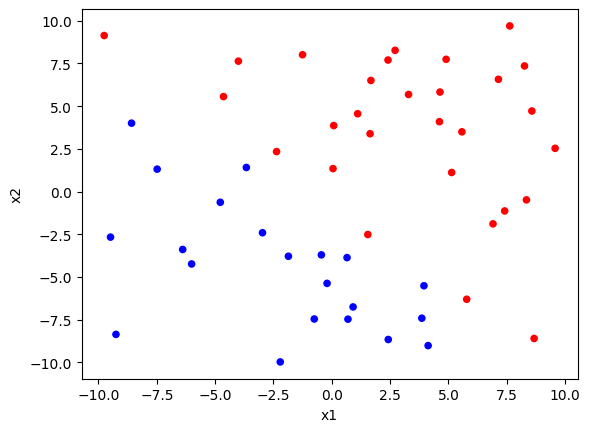

In [4]:
c = df['y'].map({-1:'b', 1: 'r'})
df.plot.scatter(x='x1', y='x2', c=c)

In [5]:
df.insert(0, "x0", 1)
df.head()

,x0,x1,x2,y
0,1,-4.641770,5.558556,1
1,1,7.139793,6.571105,1
2,1,4.127969,-9.024912,-1
3,1,0.081377,3.861381,1
4,1,-1.253937,8.009625,1


In [6]:
def find_misclassified(x, y, weight):
    misclassified_indices = []
    for i in range(len(x)):
        dot_product = np.dot(x[i], weight)
        if np.sign(dot_product) != y[i]:
            misclassified_indices.append(i)

    return misclassified_indices

In [7]:
def PLA(df, max_iterations=100):
    w = np.zeros(3)
    df_x = df.iloc[:, [0, 1, 2]].values
    df_y = df.iloc[:, 3].values

    for _ in range(max_iterations):
        misclassified_indices = find_misclassified(df_x, df_y, w)
        if len(misclassified_indices) == 0:
            break

        index = np.random.choice(misclassified_indices)
        x_mis, y_mis = df_x[index], df_y[index]
        w += x_mis * y_mis

        print(f"Current weights: {w}, Misclassified: {len(misclassified_indices)}")
    return w

In [8]:
def evaluate(x, y, weight):
    return len(find_misclassified(x, y, weight))

In [9]:
def Pocket_algo(df, max_iterations=100):
    w = np.zeros(3)
    best_w = np.copy(w)
    df_x = df.iloc[:, [0, 1, 2]].values
    df_y = df.iloc[:, 3].values

    min_misclassified = evaluate(df_x, df_y, w)

    for _ in range(max_iterations):
        misclassified_indices = find_misclassified(df_x, df_y, w)
        if len(misclassified_indices) == 0:
            break

        index = np.random.choice(misclassified_indices)
        x_mis, y_mis = df_x[index], df_y[index]
        w += x_mis * y_mis

        num_misclassified = evaluate(df_x, df_y, w)
        if num_misclassified < min_misclassified:
            best_w = np.copy(w)
            min_misclassified = num_misclassified

        print(f"Current weights: {w}, Best weights: {best_w}, Misclassified: {num_misclassified}")

    return best_w

In [13]:
# Run PLA algorithm
w_PLA = PLA(df)
w_PLA

Current weights: [ 1.          8.66997987 -8.60727169], Misclassified: 50
Current weights: [ 2.         10.34519575 -2.1038069 ], Misclassified: 28
Current weights: [3.         6.34027927 5.53004794], Misclassified: 18
Current weights: [ 4.         -3.41533711 14.66461333], Misclassified: 2
Current weights: [5.         5.25464277 6.05734164], Misclassified: 10
Current weights: [6.         6.79819893 3.53771583], Misclassified: 3
Current weights: [5.         2.84910775 9.05719751], Misclassified: 6
Current weights: [6.         8.63059189 2.74620943], Misclassified: 5
Current weights: [ 7.         -1.12502449 11.88077482], Misclassified: 9
Current weights: [8.         5.78297315 9.98479217], Misclassified: 10
Current weights: [7.         9.44546628 8.57819091], Misclassified: 4
Current weights: [ 8.         10.98902244  6.0585651 ], Misclassified: 2
Current weights: [ 7.          7.03993127 11.57804678], Misclassified: 5
Current weights: [ 8.         15.70991114  2.97077509], Misclassifi

array([23.        , 20.08465396, 19.08710107])

In [14]:
# Run Pocket Algorithm
w_pocket = Pocket_algo(df)
w_pocket

Current weights: [-1.          1.86067697  3.79298649], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 3
Current weights: [ 0.         10.53065684 -4.8142852 ], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 22
Current weights: [ 1.         12.20587272  1.68917959], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 11
Current weights: [2.         9.83783978 4.0264631 ], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 7
Current weights: [ 3.          5.8329233  11.66031794], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 3
Current weights: [4.         7.37647946 9.14069213], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 3
Current weights: [ 5.         13.1579636   2.82970405], Best weights: [-1.          1.86067697  3.79298649], Misclassified: 9
Current weights: [ 4.         10.73880068 11.49674928], Best weights: [-1.          1.86067697  3.79298649], Misclassified

array([27.        , 24.1017513 , 24.88038258])

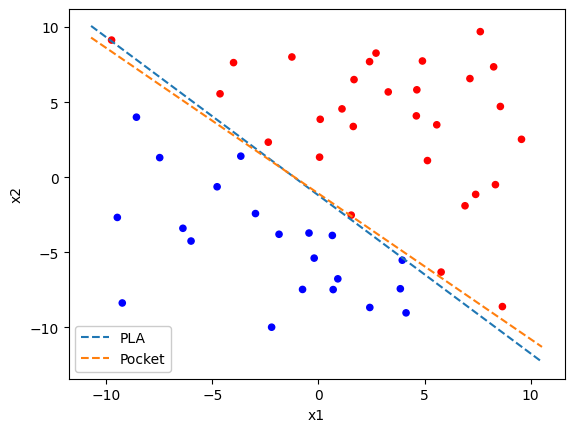

In [21]:
c = df['y'].map({-1:'b', 1: 'r'})
df.plot.scatter(x='x1', y='x2', c=c)
axes = plt.gca()
x_val = np.array(axes.get_xlim())
# x_val = np.linspace(-10, 10, 100)
y_val_PLA = -w_PLA[0]/w_PLA[2] - w_PLA[1]/w_PLA[2] * x_val
y_val_pocket = -w_pocket[0]/w_pocket[2] - w_pocket[1]/w_pocket[2] * x_val
plt.plot(x_val, y_val_PLA, '--', label='PLA')
plt.plot(x_val, y_val_pocket, '--', label='Pocket')
plt.legend(framealpha=1, frameon=True);